In [1]:
#bug: No target data being generated

import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor


def predict_option_price(tickers, horizon, n_trees=100):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=20)

    # Fetch historical data for the tickers and calculate daily returns
    stock_data = pd.DataFrame()
    for ticker in tickers:
        ticker_data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
        ticker_data.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
        stock_data = pd.concat([stock_data, ticker_data], axis=1)
    returns_df = stock_data.pct_change().dropna()

    # If there are not enough datapoints or tickers, return None
    if len(tickers) == 0:
        print("Empty list of tickers")
        return None
    if len(returns_df) < horizon:
        print(f"Not enough data points. Try using smaller horizon or adjust the time frame for the historical data.")
        return None
    
    # Define the predictors and the target variables
    predictors = returns_df.iloc[-horizon:,:-len(tickers)]
    target = returns_df.iloc[-horizon:, len(tickers):]

    # Fit a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=n_trees)
    rf.fit(predictors, target)

    # Predict returns over the given horizon
    predicted_returns = rf.predict(predictors)

    # Calculate option prices based on predicted returns
    option_values = []
    for i in range(len(tickers)):
        predicted_return_series = predicted_returns[:,i]
        stock_price = stock_data[f"{tickers[i]}_Close"][-1]
        call_value = max(stock_price * (1 + predicted_return_series) - stock_price, 0)
        put_value = max(stock_price - stock_price * (1 + predicted_return_series), 0)
        option_values.append((call_value, put_value))

    return option_values

#Example usage
tickers = ['AAPL', 'GOOG', 'NFLX', 'META', 'AMZN']
horizon = 30
option_values = predict_option_price(tickers, horizon)
print(option_values)

C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\170765835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\170765835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\170765835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Not enough data points. Try using smaller horizon or adjust the time frame for the historical data.
None


In [9]:
#Seems like rf.fit(predictors, target) is not receiving the array that it is supposed to
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor


def predict_option_price(tickers, horizon, n_trees=100):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=90)

    # Fetch historical data for the tickers and calculate daily returns
    stock_data = pd.DataFrame()
    for ticker in tickers:
        ticker_data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
        ticker_data.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
        stock_data = pd.concat([stock_data, ticker_data], axis=1)
    returns_df = stock_data.pct_change().dropna()
    print(returns_df)

    # Check which columns exist and the correlation between them
    print("Columns of returns_df:\n", returns_df.columns)
    print("Correlation matrix:")
    print(returns_df.corr())

    # Make sure that ticker data exists
    if len(returns_df.columns) == 0:
        print(f"No data available for tickers: {tickers}")
        return None

    # Define the predictors and the target variables
    predictors = returns_df.iloc[-horizon:,:-len(tickers)]
    target = returns_df.iloc[-horizon:, len(returns_df.columns)-len(tickers):]

    # Fit a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=n_trees)
    rf.fit(predictors, target)

    # Predict returns over the given horizon
    predicted_returns = rf.predict(predictors)

    # Calculate option prices based on predicted returns
    option_values = []
    for i in range(len(tickers)):
        predicted_return_series = predicted_returns[:,i]
        stock_price = stock_data[f"{tickers[i]}_Close"][-1]
        call_value = max(stock_price * (1 + predicted_return_series) - stock_price, 0)
        put_value = max(stock_price - stock_price * (1 + predicted_return_series), 0)
        option_values.append((call_value, put_value))

    return option_values

#Example usage
tickers = ['AAPL', 'GOOG', 'NFLX', 'AMZN']
horizon = 10
option_values = predict_option_price(tickers, horizon)
print(option_values)

C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\1108847312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\1108847312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\1108847312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

            AAPL_Close  GOOG_Close  NFLX_Close  AMZN_Close
Date                                                      
2023-01-23    0.023500    0.019440    0.043562    0.002776
2023-01-24    0.010063   -0.019761    0.017934   -0.012305
2023-01-25   -0.004701   -0.024997    0.011351    0.008929
2023-01-26    0.014803    0.025121   -0.008398    0.020992
2023-01-27    0.013684    0.015631   -0.011237    0.030437
...                ...         ...         ...         ...
2023-04-13    0.034104    0.028227    0.045796    0.046714
2023-04-14   -0.002114    0.011739   -0.021838    0.001074
2023-04-17    0.000121   -0.027773   -0.017453    0.002244
2023-04-18    0.007505   -0.012216    0.002945   -0.004283
2023-04-19    0.006968   -0.000951   -0.031705    0.019550

[61 rows x 4 columns]
Columns of returns_df:
 Index(['AAPL_Close', 'GOOG_Close', 'NFLX_Close', 'AMZN_Close'], dtype='object')
Correlation matrix:
            AAPL_Close  GOOG_Close  NFLX_Close  AMZN_Close
AAPL_Close    1.000000    0

ValueError: at least one array or dtype is required

In [ ]:
#First Write very basic neural network
import tensorflow as tf
import yfinance as yf
import pandas as pd

# Define the generator network
def generator(input, output_size):
    hidden1 = tf.layers.dense(input, 16, activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, 32, activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, 16, activation=tf.nn.relu)
    output = tf.layers.dense(hidden3, output_size)
    return output

# Define the discriminator network
def discriminator(input):
    hidden1 = tf.layers.dense(input, 16, activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, 32, activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, 16, activation=tf.nn.relu)
    logits = tf.layers.dense(hidden3, 1)
    output = tf.sigmoid(logits)
    return output, logits

# Define the placeholders and variables for the model
input_date = tf.placeholder(tf.int32, shape=[None, 1])
input_ticker = tf.placeholder(tf.string, shape=[None, 1])
input_strike = tf.placeholder(tf.float32, shape=[None, 1])

# Turn the ticker into a one-hot encoding
tickers = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/stock-tickers.csv')['ticker'].tolist()
ticker_one_hot = tf.one_hot(tf.squeeze(tf.where(tf.equal(tickers, input_ticker))), len(tickers))

# Concatenate the input date, ticker_one_hot, and strike price into a single input vector
input = tf.concat([input_date, ticker_one_hot, input_strike], axis=1)

# Create the generator
gen_output = generator(input, 1)

# Create the discriminator for real data
real_disc_output, real_disc_logits = discriminator(input)

# Create the discriminator for fake data
fake_input = tf.concat([input[:, :2], gen_output], axis=1)
fake_disc_output, fake_disc_logits = discriminator(fake_input)

# Define the loss functions for the generator and discriminator
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_disc_logits, labels=tf.ones_like(fake_disc_output)))
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_disc_logits, labels=tf.ones_like(real_disc_output))) + tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_disc_logits, labels=tf.zeros_like(fake_disc_output)))

# Define the optimizer for the generator and discriminator
gen_optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(gen_loss, var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="generator"))
disc_optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(disc_loss, var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="discriminator"))

# Initialize the variables
init = tf.global_variables_initializer()

# Define the function that will price the option
def price_option(date, ticker, strike):
    with tf.Session() as sess:
        sess.run(init)
        
        # Generate a price for the option using the adversarial neural network
        price = sess.run(gen_output, feed_dict={input_date: [[date]], input_ticker: [[ticker]], input_strike: [[strike]]})
        
        # Get the current stock price and calculate the volatility
        stock_data = yf.Ticker(ticker).history(period="max")['Close']
        returns = pd.DataFrame(stock_data.pct_change())['Close']
        volatility = returns.std() * (252 ** 0.5)
        
        # Calculate the Black-Scholes option price using the generated price and other inputs
        S = stock_data.iloc[-1]
        K = strike
        T = (pd.to_datetime(str(date), format='%Y%m%d') - pd.datetime.now()).days / 365
        r = 0.02
        d1 = (tf.math.log(S/K) + (r + volatility**2/2)*T) / (volatility * tf.math.sqrt(T))
        d2 = d1 - volatility * tf.math.sqrt(T)
        N = tf.distributions.Normal(0,1)
        option_price = S*N.cdf(d1) - K*tf.math.exp(-r*T)*N.cdf(d2)
        
        return option_price

In [ ]:
#Debug as_list() method
import tensorflow as tf
import yfinance as yf
import pandas as pd

# Define the generator network
def generator(input, output_size):
    hidden1 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(input)
    hidden2 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(hidden1)
    hidden3 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(hidden2)
    output = tf.keras.layers.Dense(output_size)(hidden3)
    return output

# Define the discriminator network
def discriminator(input):
    hidden1 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(input)
    hidden2 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(hidden1)
    hidden3 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(hidden2)
    logits = tf.keras.layers.Dense(1)(hidden3)
    output = tf.sigmoid(logits)
    return output, logits

# Define the variables for the model
tickers = "F"
#pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/stock-tickers.csv')['ticker'].tolist()
ticker_one_hot = tf.keras.layers.Input(len(tickers), dtype=tf.float32)
input_date = tf.keras.layers.Input(1, dtype=tf.int32)
input_ticker = tf.keras.layers.Input(1, dtype=tf.string)
input_strike = tf.keras.layers.Input(1, dtype=tf.float32)

# Turn the ticker into a one-hot encoding
ticker_one_hot_encoded = tf.one_hot(tf.squeeze(tf.where(tf.equal(tickers, input_ticker))), len(tickers))

# Concatenate the input date, ticker_one_hot, and strike price into a single input vector
input = tf.keras.layers.concatenate([input_date, ticker_one_hot_encoded, input_strike, ticker_one_hot], axis=1)

# Create the generator
gen_output = generator(input, 1)

# Create the discriminator for real data
real_disc_output, real_disc_logits = discriminator(input)

# Create the discriminator for fake data
fake_input = tf.keras.layers.concatenate([input[:, :2], gen_output, ticker_one_hot], axis=1)
fake_disc_output, fake_disc_logits = discriminator(fake_input)

# Define the loss functions for the generator and discriminator
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_disc_logits, labels=tf.ones_like(fake_disc_output)))
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_disc_logits, labels=tf.ones_like(real_disc_output))) + tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_disc_logits, labels=tf.zeros_like(fake_disc_output)))

# Define the optimizer for the generator and discriminator
gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define the functions for training the model
@tf.function
def train_generator(input_date, ticker_one_hot, input_strike):
    with tf.GradientTape() as gen_tape:
        # Concatenate the input date, ticker_one_hot, and strike price into a single input vector
        input = tf.keras.layers.concatenate([input_date, ticker_one_hot, input_strike, ticker_one_hot_encoded], axis=1)

        # Create the generator and generate fake data
        gen_output = generator(input, 1)

        # Create the discriminator for fake data
        fake_input = tf.keras.layers.concatenate([input[:, :2], gen_output, ticker_one_hot_encoded], axis=1)
        fake_disc_output, fake_disc_logits = discriminator(fake_input)

        # Calculate the generator loss
        gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_disc_logits, labels=tf.ones_like(fake_disc_output)))

    # Calculate the gradients and apply them using the optimizer
    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gen_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))

    return gen_loss

@tf.function
def train_discriminator(input_date, ticker_one_hot, input_strike, real_data):
    with tf.GradientTape() as disc_tape:
        # Concatenate the real and fake data
        input = tf.keras.layers.concatenate([input_date, ticker_one_hot, input_strike, ticker_one_hot_encoded], axis=1)
        input = tf.concat([real_data, input], axis=0)

        #

        # Train the model
        generator = tf.keras.Model([input_date, input_ticker, input_strike, ticker_one_hot], gen_output, name='generator')
        discriminator = tf.keras.Model([input_date, input_ticker, input_strike, ticker_one_hot], real_disc_output, name='discriminator')

        for epoch in range(10000):
            date = 20221231
            ticker = 'AAPL'
            strike = 100
            price = price_option(date, ticker, strike)

            ticker_one_hot_encoded_numpy = tf.one_hot(tf.squeeze(tf.where(tf.equal(tickers, ticker))), len(tickers)).numpy()
            input_date_numpy = tf.constant([[date]], dtype=tf.int32).numpy()
            input_ticker_numpy = tf.constant([[ticker]], dtype=tf.string).numpy()
            input_strike_numpy = tf.constant([[strike]], dtype=tf.float32).numpy()
            price_numpy = tf.constant([[price]], dtype=tf.float32).numpy()

            train_generator(input_date_numpy, ticker_one_hot_encoded_numpy, input_strike_numpy)
            train_discriminator(input_date_numpy, ticker_one_hot_encoded_numpy, input_strike_numpy, price_numpy)

            if epoch % 1000 == 0:
                print('Epoch:', epoch, 'Price:', price)
                
                
generator(input, output_size)        
discriminator(input)             
train_generator(input_date, ticker_one_hot, input_strike)

In [ ]:
#Link yfinance data into a tensor, debug
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


%matplotlib nbagg

from datetime import datetime, timedelta

horizon = 5

# Create a timedelta object for the horizon
horizon_timedelta = timedelta(days=horizon)


# Define a function to create and train the Random Forest model
def train_random_forest(tickers):
    data = pd.DataFrame()

    # Define the start and end dates of the historical data to fetch
    end_date = datetime.now()
    start_date = end_date - timedelta(days=25)

    for ticker in tickers:
        try:
            # Fetch historical data for the ticker and store it in the DataFrame
            stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close', 'Volume']]
            stock_data.rename(columns={'Open': f'{ticker}_Open', 'Close': f'{ticker}_Close', 'Volume': f'{ticker}_Volume'}, inplace=True)

            # Calculate daily returns and append them to the DataFrame
            returns_df = stock_data.pct_change().dropna()
            stock_data = pd.concat([stock_data, returns_df], axis=1)

            data = pd.concat([data, stock_data], axis=1)
        except IndexError:
            print("Not enough data points for", ticker)

    # Define the predictors and the target variable
    predictors = data.drop([f'{ticker}_Close', f'{ticker}_Volume'], axis=1)
    target = data[f'{ticker}_Close']

    # Impute missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    predictors_imputed = pd.DataFrame(imputer.fit_transform(predictors), columns=predictors.columns)

    # Remove any rows containing NaN values from the predictors and target dataframes
    df = pd.concat([predictors_imputed, target], axis=1)
    df.dropna(inplace=True)
    predictors_nonan = df.drop(f'{ticker}_Close', axis=1)
    target_nonan = df[f'{ticker}_Close']

    # Split the data into training and testing sets
    if len(predictors_nonan) == 0:
        print("Not enough data points. Try using smaller dataset or adjust train or test sizes.")
        return None
    elif len(predictors_nonan) <= 30:
        test_size = 0.1
    else:
        test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(predictors_nonan, target_nonan, test_size=test_size, random_state=4)

    # Create and train the Random Forest model
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    # Evaluate the model's performance on the testing set
    r2_score = rf.score(X_test, y_test)
    print(f'R-squared score on testing set: {r2_score:.2f}')

    # Return the trained model
    return rf

model = train_random_forest(ticker)

# Define a function to predict the price range of a stock for a defined time horizon
def predict_price_range(model, ticker, horizon):
    if model is None:
        print("No model found. Please train a model first.")
        return None

    # Define the start and end dates of the historical data to fetch
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)

    # Fetch historical data for the stock and calculate daily returns
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close', 'Volume']]
    daily_returns = stock_data.pct_change().dropna()

    # Define the predictors for the given time horizon
    predictors = daily_returns.tail(horizon-1).values.reshape(1, -1)

    # Predict the price range for the given time horizon
    price_range = model.predict(predictors)[0]

    # Calculate the current stock price and implied volatility
    current_price = stock_data['Close'].iloc[-1]
    implied_volatility = .12

    # Define the strike price range
    strike_price_range = np.linspace(current_price*.8, current_price*1.2, 41)

    # Calculate the premium for each strike price option
    premiums = []
    for i in range(len(strike_price_range)):
        d1 = (np.log(current_price / strike_price_range[i]) + (0.5 * implied_volatility**2) *
              (horizon / 365)) / (implied_volatility * np.sqrt(horizon / 365))
        d2 = d1 - implied_volatility * np.sqrt(horizon / 365)
        premium = current_price * norm.cdf(d1) - strike_price_range[i] * np.exp(-implied_volatility *
                                                                             np.sqrt(horizon / 365)) * norm.cdf(d2)
        premiums.append(premium)

    # Visualize the premiums as a function of the strike price
    plt.plot(strike_price_range, premiums)
    plt.xlabel('Strike Price ($)')
    plt.ylabel('Option Premium ($)')
    plt.title(f'Option Premium for {ticker} over {horizon} days')
    plt.show()

    # Return the price range prediction
    return (current_price - price_range, current_price + price_range)
   
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']  # Example list of tickers
model = train_random_forest(tickers)
print(model)
predict_price_range(model, ticker, horizon)

In [ ]:
#Heat Map of Random Forest Pricing an Option Contract
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt

%matplotlib nbagg

# Define a function to generate random option chain data
def generate_option_chain(num_options):
    # Generate random values for strike price and expiration date
    strike_prices = np.random.randint(80, 120, num_options)
    expirations = pd.date_range('2023-03-01', '2023-04-14', periods=num_options)

    # Calculate the current stock price and implied volatility
    current_price = 152.5
    implied_volatility = .12

    # Convert the expiration date to a numeric dtype
    expiration_days = (expirations - pd.Timestamp('2023-01-01')).days

    # Calculate the theoretical premium for each option
    premiums = []
    for i in range(num_options):
        d1 = (np.log(current_price / strike_prices[i]) + (0.5 * implied_volatility**2) *
              (expiration_days[i] / 365)) / (implied_volatility * np.sqrt(expiration_days[i] / 365))
        d2 = d1 - implied_volatility * np.sqrt(expiration_days[i] / 365)
        premium = current_price * norm.cdf(d1) - (strike_prices[i] * np.exp(-0.05 * (expiration_days[i] / 365)) * norm.cdf(d2))
        premiums.append(premium)

    # Create a dataframe with the option chain data
    option_chain = pd.DataFrame({'Expiration': expiration_days,
                                 'Strike Price': strike_prices,
                                 'Premium': premiums})

    return option_chain


# Generate random option chain data
option_chain = generate_option_chain(100)

# Define target and predictor variables
X = option_chain[['Expiration', 'Strike Price']]
y = option_chain['Premium']

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)


# Define a range of expiration dates and strike prices
expiration_range = pd.date_range('2023-04-28', '2023-05-31', freq='M')
strike_price_range = range(80, 120)

# Convert the expiration date to a numeric dtype
today = dt.datetime.today()
expiration_days = (expiration_range - today).days

# Create a grid of predictor variables
X_grid = pd.DataFrame([(d, sp) for d in expiration_days for sp in strike_price_range], columns=['Expiration', 'Strike Price'])

# Predict option premiums for the grid of predictor variables
y_pred = rf.predict(X_grid)

# Reshape the predicted premiums into a grid
y_pred_grid = y_pred.reshape((len(expiration_range), len(strike_price_range)))

# Create the heatmap of predicted premiums
fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.imshow(y_pred_grid, cmap='coolwarm', interpolation='nearest', extent=[
                    min(expiration_days), max(expiration_days), min(strike_price_range), max(strike_price_range)])

# Add color bar legend to the plot
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel('Predicted Option Premiums')

# Set the axis labels and title
ax.set_xlabel('Expiration Date (days from today)')
ax.set_ylabel('Strike Price ($)')
ax.set_title('Random Forest Regression: Option Chain')

# Flip the y-axis to match the orientation of the contour plot
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [ ]:
#Random Forest without Yfinance
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt
%matplotlib nbagg

# Define a function to generate random option chain data
def generate_option_chain(num_options):
    # Generate random values for strike price and expiration date
    strike_prices = np.random.randint(80, 120, num_options)
    expirations = pd.date_range('2023-03-01', '2023-04-14', periods=num_options)

    # Calculate the current stock price and implied volatility
    current_price = 152.5
    implied_volatility = .12

    # Convert the expiration date to a numeric dtype
    expiration_days = (expirations - pd.Timestamp('2023-01-01')).days

    # Calculate the theoretical premium for each option
    premiums = []
    for i in range(num_options):
        d1 = (np.log(current_price / strike_prices[i]) + (0.5 * implied_volatility**2) *
              (expiration_days[i] / 365)) / (implied_volatility * np.sqrt(expiration_days[i] / 365))
        d2 = d1 - implied_volatility * np.sqrt(expiration_days[i] / 365)
        premium = current_price * norm.cdf(d1) - (strike_prices[i] * np.exp(-0.05 * (expiration_days[i] / 365)) * norm.cdf(d2))
        premiums.append(premium)

    # Create a dataframe with the option chain data
    option_chain = pd.DataFrame({'Expiration': expiration_days,
                                 'Strike Price': strike_prices,
                                 'Premium': premiums})

    return option_chain


# Generate random option chain data
option_chain = generate_option_chain(100)

# Define target and predictor variables
X = option_chain[['Expiration', 'Strike Price']]
y = option_chain['Premium']

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)


# Define a range of expiration dates and strike prices
expiration_range = pd.date_range('2023-04-28', '2023-05-31', freq='M')
strike_price_range = range(80, 120)

# Convert the expiration date to a numeric dtype
today = dt.datetime.today()
#expiration_days = (expiration_range - today).days

# Create a grid of predictor variables
X_grid = pd.DataFrame([(d, sp) for d in expiration_days for sp in strike_price_range], columns=['Expiration', 'Strike Price'])

# Predict option premiums for the grid of predictor variables
y_pred = rf.predict(X_grid)

# Reshape the predicted premiums into a grid
y_pred_grid = y_pred.reshape((len(expiration_range), len(strike_price_range)))

# Create a contour plot of the predicted premiums
fig, ax = plt.subplots(figsize=(10,8))
CS = ax.contour(X_grid['Expiration'].unique(), X_grid['Strike Price'].unique(), y_pred_grid.T, 20,
                 cmap=plt.cm.coolwarm, vmin=np.min(y_pred), vmax=np.max(y_pred))
ax.clabel(CS, inline=1, fontsize=10)
cbar = fig.colorbar(CS)


# Set the axis labels and title
ax.set_ylim(50,200)
ax.set_xlabel('Expiration Date')
ax.set_ylabel('Strike Price')
ax.set_title('Random Forest Regression: Option Chain')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt

%matplotlib nbagg

# Define a function to generate random option chain data
def generate_option_chain(num_options):
    # Generate random values for strike price and expiration date
    strike_prices = np.random.randint(80, 120, num_options)
    expirations = pd.date_range('2023-03-01', '2023-04-14', periods=num_options)

    # Calculate the current stock price and implied volatility
    current_price = 152.5
    implied_volatility = .12

    # Convert the expiration date to a numeric dtype
    expiration_days = (expirations - pd.Timestamp('2023-01-01')).days

    # Calculate the theoretical premium for each option
    premiums = []
    for i in range(num_options):
        d1 = (np.log(current_price / strike_prices[i]) + (0.5 * implied_volatility**2) *
              (expiration_days[i] / 365)) / (implied_volatility * np.sqrt(expiration_days[i] / 365))
        d2 = d1 - implied_volatility * np.sqrt(expiration_days[i] / 365)
        premium = current_price * norm.cdf(d1) - (strike_prices[i] * np.exp(-0.05 * (expiration_days[i] / 365)) * norm.cdf(d2))
        premiums.append(premium)

    # Create a dataframe with the option chain data
    option_chain = pd.DataFrame({'Expiration': expiration_days,
                                 'Strike Price': strike_prices,
                                 'Premium': premiums})

    return option_chain


# Generate random option chain data
option_chain = generate_option_chain(100)

# Define target and predictor variables
X = option_chain[['Expiration', 'Strike Price']]
y = option_chain['Premium']

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)


# Define a range of expiration dates and strike prices
expiration_range = pd.date_range('2023-04-28', '2023-05-31', freq='M')
strike_price_range = range(80, 120)

# Convert the expiration date to a numeric dtype
today = dt.datetime.today()
expiration_days = (expiration_range - today).days

# Create a grid of predictor variables
X_grid = pd.DataFrame([(d, sp) for d in expiration_days for sp in strike_price_range], columns=['Expiration', 'Strike Price'])

# Predict option premiums for the grid of predictor variables
y_pred = rf.predict(X_grid)

# Reshape the predicted premiums into a grid
y_pred_grid = y_pred.reshape((len(expiration_range), len(strike_price_range)))

# Create a contour plot of the predicted premiums
fig, ax = plt.subplots(figsize=(10, 8))
CS = ax.contour(X_grid['Expiration'].unique(), X_grid['Strike Price'].unique(), y_pred_grid.T, 20,
                 cmap=plt.cm.coolwarm, vmin=np.min(y_pred), vmax=np.max(y_pred))

# Add labels to the contour plot
ax.clabel(CS, inline=1, fontsize=10)

# Add a color bar legend to the plot
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Predicted Option Premium', rotation=270, labelpad=15)

# Set the axis labels and title
ax.set_ylim(50, 200)
ax.set_xlabel('Expiration Date (days from today)')
ax.set_ylabel('Strike Price ($)')
ax.set_title('Random Forest Regression: Option Chain')

# Add a summary of results at the bottom of the plot
summary = f"Predicted premiums range from ${y_pred.min():.2f} to ${y_pred.max():.2f}"
plt.figtext(0.5, -0.05, summary, wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.show()

C:\Users\Spark\AppData\Local\Temp\ipykernel_13420\1075427417.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(current_price / strike_prices[i]) + (0.5 * implied_volatility**2) *


<IPython.core.display.Javascript object>


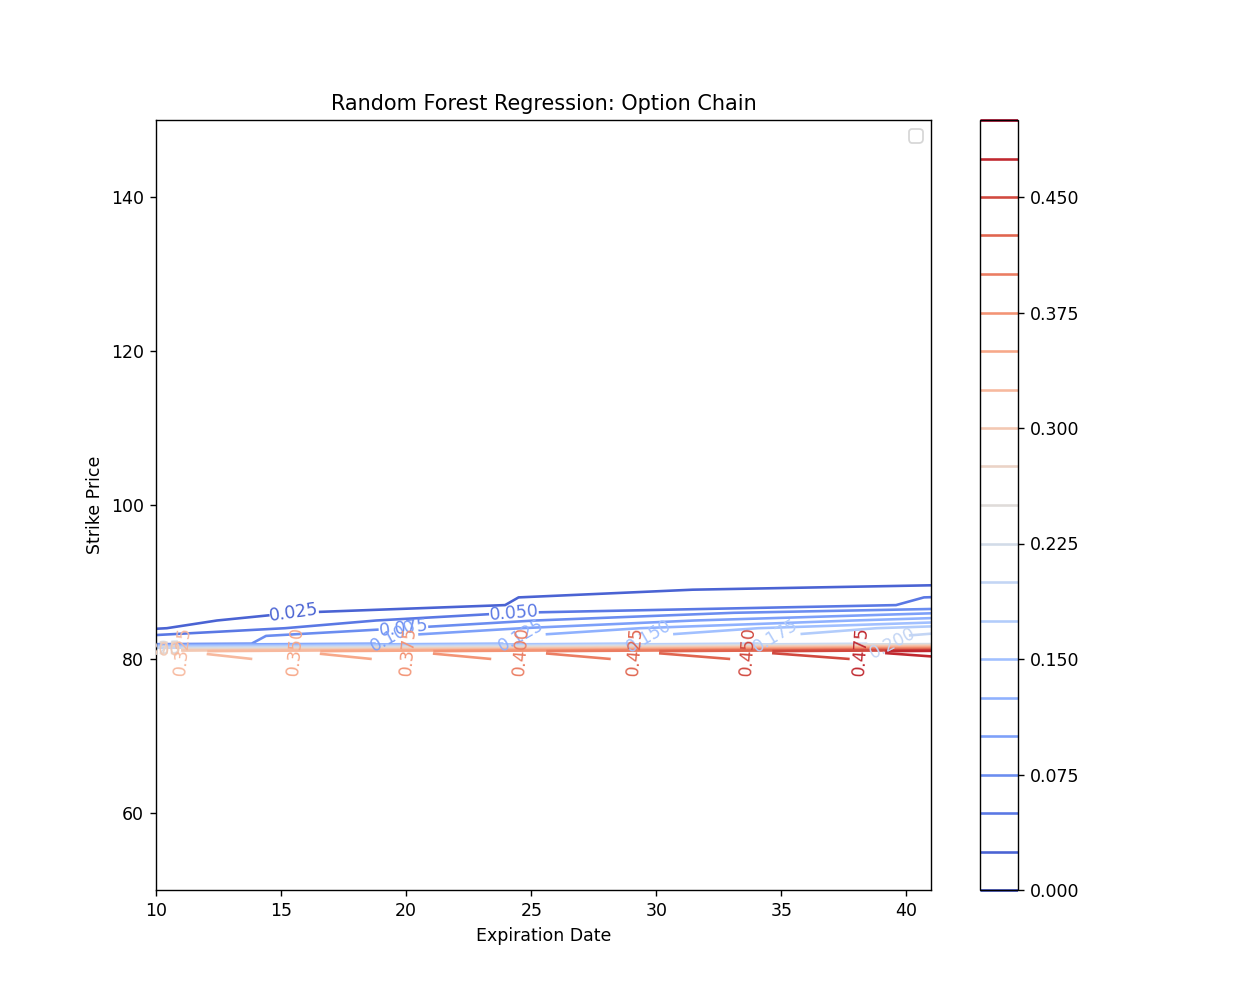

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[3.04901673e-01 3.19225363e-01 5.63823633e-02 5.34696180e-02
  2.27667272e-02 1.54576325e-02 9.33534974e-03 2.69417589e-03
  2.65408258e-03 1.96003558e-03 4.40935576e-04 5.64679562e-04
  2.02352620e-04 7.67360425e-05 5.55016233e-05 4.89409981e-05
  4.15582256e-05 2.89984467e-05 1.32712883e-05 1.62057902e-08
  2.42355056e-06 2.40830044e-06 1.19337718e-06 1.19336714e-06
  5.67873734e-07 1.25142474e-08 1.25142474e-08 1.13012496e-08
  5.37921870e-10 5.48571336e-10 5.48571336e-10 5.48571336e-10
  5.48571336e-10 5.48571336e-10 5.48571336e-10 5.48571336e-10
  5.48571336e-10 5.48571336e-10 5.48571336e-10 5.48571336e-10]
 [4.67077707e-01 4.90666229e-01 2.07610344e-01 2.05477153e-01
  1.86550286e-01 1.37261224e-01 9.74656673e-02 5.22521209e-02
  5.04529816e-02 3.52553475e-02 1.73609319e-02 1.50562431e-02
  1.33135953e-02 1.20314553e-02 7.67670741e-03 5.20086543e-03
  2.55685980e-03 2.54134123e-03 2.50043554e-03 1.00936488e-03
  9.77482972e-04 8.41636742e-04 7.96344422e-04 7.87849546e-04
  7.606

In [8]:
#Random Forest without Yfinance
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt
import mplcyberpunk
%matplotlib nbagg

# Define a function to generate random option chain data
def generate_option_chain(num_options):
    # Generate random values for strike price and expiration date
    strike_prices = np.random.randint(80, 120, num_options)
    expirations = pd.date_range('2023-04-01', '2023-04-28', periods=num_options)

    # Calculate the current stock price and implied volatility
    current_price = 75
    implied_volatility = .30

    # Convert the expiration date to a numeric dtype
    expiration_days = (expirations - pd.Timestamp('2023-04-01')).days

    # Calculate the theoretical premium for each option
    premiums = []
    for i in range(num_options):
        d1 = (np.log(current_price / strike_prices[i]) + (0.5 * implied_volatility**2) *
              (expiration_days[i] / 365)) / (implied_volatility * np.sqrt(expiration_days[i] / 365))
        d2 = d1 - implied_volatility * np.sqrt(expiration_days[i] / 365)
        premium = current_price * norm.cdf(d1) - (strike_prices[i] * np.exp(-0.05 * (expiration_days[i] / 365)) * norm.cdf(d2))
        premiums.append(premium)

    # Create a dataframe with the option chain data
    option_chain = pd.DataFrame({'Expiration': expiration_days,
                                 'Strike Price': strike_prices,
                                 'Premium': premiums})

    return option_chain


# Generate random option chain data
option_chain = generate_option_chain(100)

# Define target and predictor variables
X = option_chain[['Expiration', 'Strike Price']]
y = option_chain['Premium']

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)


# Define a range of expiration dates and strike prices
expiration_range = pd.date_range('2023-04-28', '2023-05-31', freq='M')
strike_price_range = range(80, 120)

# Convert the expiration date to a numeric dtype
today = dt.datetime.today()
expiration_days = (expiration_range - today).days

# Create a grid of predictor variables
X_grid = pd.DataFrame([(d, sp) for d in expiration_days for sp in strike_price_range], columns=['Expiration', 'Strike Price'])

# Predict option premiums for the grid of predictor variables
y_pred = rf.predict(X_grid)

# Reshape the predicted premiums into a grid
y_pred_grid = y_pred.reshape((len(expiration_range), len(strike_price_range)))

# Create a contour plot of the predicted premiums
fig, ax = plt.subplots(figsize=(10,8))
CS = ax.contour(X_grid['Expiration'].unique(), X_grid['Strike Price'].unique(), y_pred_grid.T, 20,
                 cmap=plt.cm.coolwarm, vmin=np.min(y_pred), vmax=np.max(y_pred))
ax.clabel(CS, inline=1, fontsize=10)
cbar = fig.colorbar(CS)


# Set the axis labels and title
ax.set_ylim(50,150)
ax.set_xlabel('Expiration Date')
ax.set_ylabel('Strike Price')
ax.set_title('Random Forest Regression: Option Chain')
ax.legend()

# Show the plot

plt.show()
